In [2]:
using CSV
using DataFrames

df = CSV.read("../data/race_dataset.csv", DataFrame)

Row,box,odds,slit_score,horse
,Int64,Float64,Float64,String31
1,2,4.7,1.0,ブラウンラチェット
2,1,15.6,0.498544,ミストレス
3,8,4.1,0.498544,ショウナンザナドゥ
4,4,6.6,0.353499,シホリーン
5,3,6.3,0.296296,マイエレメント
6,10,3.1,0.245623,カムニャック
7,6,57.9,0.125,マピュース
8,11,79.9,0.0251356,クレオズニードル
9,5,13.4,0.00201291,ミリオンローズ


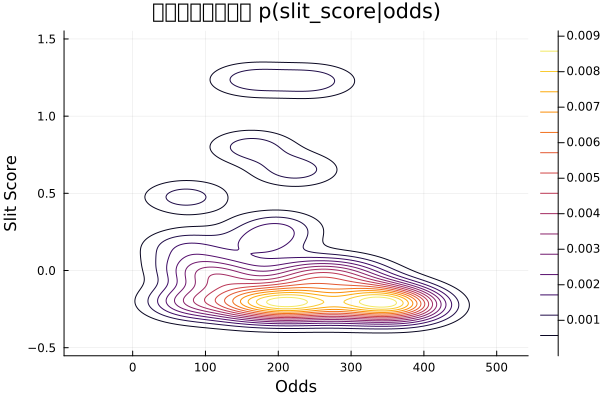

GKS: glyph missing from current font: 26465
GKS: glyph missing from current font: 20214
GKS: glyph missing from current font: 20184
GKS: glyph missing from current font: 12365
GKS: glyph missing from current font: 30906
GKS: glyph missing from current font: 29575
GKS: glyph missing from current font: 23494
GKS: glyph missing from current font: 24230
GKS: glyph missing from current font: 26465
GKS: glyph missing from current font: 20214
GKS: glyph missing from current font: 20184
GKS: glyph missing from current font: 12365
GKS: glyph missing from current font: 30906
GKS: glyph missing from current font: 29575
GKS: glyph missing from current font: 23494
GKS: glyph missing from current font: 24230
GKS: glyph missing from current font: 26465
GKS: glyph missing from current font: 20214
GKS: glyph missing from current font: 20184
GKS: glyph missing from current font: 12365
GKS: glyph missing from current font: 30906
GKS: glyph missing from current font: 29575
GKS: glyph missing from current 

get_conditional_density (generic function with 1 method)

In [3]:
using KernelDensity
using Plots

# データの準備
odds_data = df.odds
slit_score_data = df.slit_score

# 2次元KDEの計算
k = kde((odds_data, slit_score_data))

# 可視化
p = contour(k.x, k.y, k.density,
    xlabel="Odds",
    ylabel="Slit Score",
    title="条件付き確率密度 p(slit_score|odds)")
display(p)

# 特定のoddsに対するslit_scoreの条件付き確率密度を取得する関数
function get_conditional_density(kde_obj, odds_value)
    # oddsに最も近いインデックスを見つける
    odds_idx = argmin(abs.(kde_obj.x .- odds_value))

    # その位置でのslit_scoreに対する確率密度を正規化
    density_slice = kde_obj.density[odds_idx, :]
    normalized_density = density_slice ./ sum(density_slice)

    return kde_obj.y, normalized_density
end